In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

import pandas
from pandas_datareader import data, wb
import numpy
import math
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.graphics.gofplots as gofplots
import statsmodels.formula.api as sm
import datetime

COLOR_REP = '#E24A33'
COLOR_DEM = '#348ABD'
COLOR_ALT = '#777777'

"For most of this paper, the data begin at the start of Harry Truman’s elected term and extend through the end of Barack Obama’s first term."

In [15]:
# For most of this paper, the data begin at 
# the start of Harry Truman’s elected term 
# and extend through the end of Barack Obama’s first term.
START_DATE = datetime.datetime(1947, 1, 1)
END_DATE = datetime.datetime(2012, 1, 1)

"During the 64 years that make up the core 16 terms, real GDP growth averaged 3.33 percent at an annual rate."

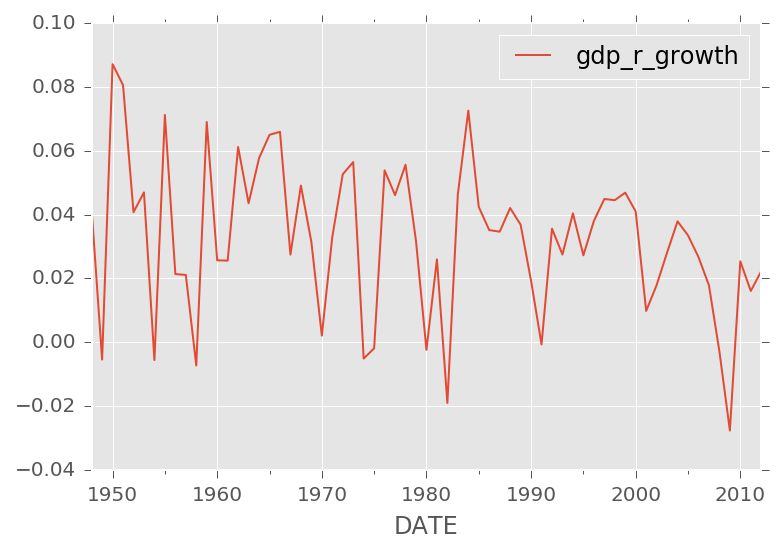

In [107]:
gdp_r = data.DataReader(name=['GDPCA'], data_source='fred', start=START_DATE, end=END_DATE)
gdp_r_growth = gdp_r.pct_change().dropna()
gdp_r_growth.columns = ['gdp_r_growth']
gdp_r_growth.plot()
plt.show()

In [108]:
print(gdp_r_growth.mean())

gdp_r_growth    0.032623
dtype: float64


"But the average growth rates under Democratic and Republican presidents were starkly different: 4.33 percent and 2.54 percent, respec- tively. This 1.79 percentage point gap (henceforth, the D-R gap) is astoundingly large relative to the sample mean."

In [110]:
president_congress = pandas.read_csv('../president_congress.csv', index_col='date', parse_dates=True)
gdp_r_growth_politics = president_congress.merge(gdp_r_growth, left_index=True, right_index=True)
print('Democratic President Average Growth Rate')
print(gdp_r_growth_politics[gdp_r_growth_politics.dem_pres == 1].gdp_r_growth.mean())
print('Democratic President Growth Rate SD')
print(gdp_r_growth_politics[gdp_r_growth_politics.dem_pres == 1].gdp_r_growth.std())
print('Republican President Average Growth Rate')
print(gdp_r_growth_politics[gdp_r_growth_politics.dem_pres == 0].gdp_r_growth.mean())
print('Republican President Growth Rate SD')
print(gdp_r_growth_politics[gdp_r_growth_politics.dem_pres == 0].gdp_r_growth.std())
print('D-R gap')
print(gdp_r_growth_politics[gdp_r_growth_politics.dem_pres == 1].gdp_r_growth.mean() 
      - gdp_r_growth_politics[gdp_r_growth_politics.dem_pres == 0].gdp_r_growth.mean())

Democratic President Average Growth Rate
0.0385126777464
Democratic President Growth Rate SD
0.024396550821
Republican President Average Growth Rate
0.0278783127042
Republican President Growth Rate SD
0.0232317201302
D-R gap
0.0106343650422


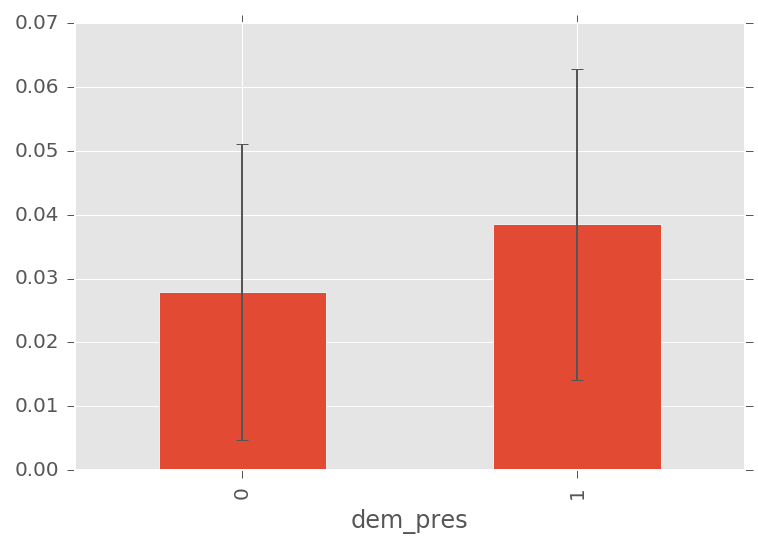

In [160]:
fig, ax = plt.subplots()
gdp_r_growth_politics.groupby('dem_pres')['gdp_r_growth'].mean().plot(yerr=e, ax=ax, kind='bar')
plt.show()